**Observational Astronomy Group 2**

**Import Libraries**

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import requests,io
import os

**Import Data Files**




In [ ]:
urldir= 'https://baltasar.centra.tecnico.ulisboa.pt/~sgonzalez/LabAst_2022/' 
from bs4 import BeautifulSoup

import warnings # ignore annoying warnings
warnings.filterwarnings(action='ignore', module='urllib3')

def get_files(day): # from an online directory
  url = urldir + "2022-09-" + str(day) + "/"
  files = []
  html_doc = requests.get(url,verify=False).text
  soup = BeautifulSoup(html_doc, 'html.parser')
  for link in soup.find_all('a'):
    files.append(link.get('href'))
  
  # cleaning up files that are NOT science (from log books)
  if(day == 26):
    trash = list(range(1,18))
    trash += list(range(51,53))
    trash += [72]
    trash += [128]
    trash += [129]
    trash += list(range(130,134))
    trash += [140]
    trash += [141]
    trash += [147]
    trash += [153]
    trash += list(range(246,253))
    
  if(day == 27):
    trash = list(range(83,93))
    trash += [110]
    trash += [111]
    trash += list(range(153,157))
    trash += [182]
    trash += [275]
    trash += list(range(414,417))
    trash += list(range(423,427))
      
  if(day == 28):
    trash = [727]
    trash += [727]
    trash += list(range(131,137))
    trash += [351]
    
  if(day == 29):
    trash = [50]
    trash += list(range(147,151))
    trash += list(range(301,305))
    trash = [345]
    
  for i in trash:
    for j in files:
        if j.endswith("0" + str(i) + ".fits"): 
            files.remove(j)
  return files  

def open_image(url): # for fits files
  return fits.open(io.BytesIO(requests.get(url,verify=False).content))

In [ ]:
def filter_files(day, targets):
  url = urldir + "2022-09-" + str(day) + "/"
  files = []
  for link in get_files(day):
    if all(target in link.lower() for target in targets): # handle different capitalizations
      files.append(url+link)
  return files

science_black = filter_files(26,('hip101748','black')) + filter_files(26,('go%20cyg','black')) + filter_files(27,('go%20cyg','black')) + filter_files(28,('gocyg','black')) + filter_files(29,('go%20cyg','black'))
science_blue = filter_files(26,('hip101748','blue')) + filter_files(26,('go%20cyg','blue')) + filter_files(27,('go%20cyg','blue')) + filter_files(28,('gocyg','blue')) + filter_files(29,('go%20cyg','blue'))
science_red = filter_files(26,('hip101748','red')) + filter_files(26,('go%20cyg','red')) + filter_files(27,('go%20cyg','red')) + filter_files(28,('gocyg','red')) + filter_files(29,('go%20cyg','red'))
science_green = filter_files(26,('hip101748','green')) + filter_files(26,('go%20cyg','green')) + filter_files(27,('go%20cyg','green')) + filter_files(28,('gocyg','green')) + filter_files(29,('go%20cyg','green'))

m57_black = filter_files(29,('m57','black'))
m57_blue = filter_files(29,('m57','blue'))
m57_green = filter_files(29,('m57','green'))
m57_red = filter_files(29,('m57','red'))

print('# science black = ', len(science_black))
print('# science blue = ', len(science_blue))
print('# science red = ', len(science_red))
print('# science green = ', len(science_green))

print('# m57 black = ', len(m57_black))
print('# m57 blue = ', len(m57_blue))
print('# m57 green = ', len(m57_green))
print('# m57 red = ', len(m57_red))

# science black =  84


NameError: ignored

**Plot Images**

In [ ]:
def plot_image(image, colormap):
  lo,up = np.percentile(image,1),np.percentile(image,99)
  plt.figure()
  plt.imshow(image,cmap=colormap,origin='lower',clim=(lo,up))
  plt.colorbar()
  plt.xlabel('xpix')
  plt.ylabel('ypix')

**Obtain Master Bias and Master Flat**

In [ ]:
def master_bias():
  days = [26,27,28,29]
  bias = []
  for day in days:
    day_path = "2022-09-" + str(day) + "/"
    directory = urldir + day_path
    for filename in get_files(day):
        if filename.startswith("bias"):
          filepath = directory+filename
          bias.append(open_image(filepath)[0].data)
  # masterbias
  bias = np.asarray(bias)
  masterbias = np.median(bias,axis=0)
  masterbias = np.asarray(masterbias)
  # read out error
  gain = 1.5 # e- / ADU
  read_out = np.array(bias.std(axis=0))
  read_out = gain * read_out
  return masterbias, read_out

In [ ]:
masterbias,read_out = master_bias()

# Write to file - to avoid running everytime, save the files and read them later on
masterbias_file = open("masterbias.txt",'w')
for line in masterbias:
  for val in line:
    masterbias_file.write(str(val) + " ")
  masterbias_file.write("\n")
masterbias_file.close()

read_out_file = open("read_out.txt",'w')
for line in read_out:
  for val in line:
    read_out_file.write(str(val) + " ")
  read_out_file.write("\n")
read_out_file.close()

(183, 1024, 1536)


In [ ]:
#READ FROM FILES

#masterbias
line = []
masterbias = []

masterbias_file = open("masterbias.txt",'r')
masterbias_file_rows = masterbias_file.read().split(" \n")

for row in masterbias_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  masterbias.append(line)

masterbias = np.asarray(masterbias)
print(np.shape(masterbias))
print(masterbias[0])

#read out
line = []
read_out = []

read_out_file = open("read_out.txt",'r')
read_out_file_rows = read_out_file.read().split(" \n")

for row in read_out_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  read_out.append(line)

read_out = np.asarray(read_out)

(1024, 1536)
[563. 564. 563. ... 557. 557. 557.]


' Prints for Testing\nprint(np.shape(read_out))\nprint(read_out[0])\nprint(read_out)\nprint(read_out.max())\nprint(read_out.min())\nprint(read_out.mean())\nprint(masterbias.max())\nprint(masterbias.min())\nprint(masterbias.mean())\nprint(len(masterbias))'

In [ ]:
def master_flat(target):
  days = [26,27,28,29]
  flat = []

  for day in days:
    day_path = "2022-09-" + str(day) + "/"
    directory = urldir + day_path
    for filename in get_files(day):
        if filename.startswith("flat"):
          if target in filename.lower():
            filepath = urldir+day_path+filename
            flat.append(open_image(filepath)[0].data)
  flat = np.asarray(flat)
  
  new_flats = []
  flats_std = []
  for image in flat:
    image = image - masterbias
    flats_std.append(np.sqrt(read_out**2+image)/np.median(image))
    image = image / np.median(image)
    new_flats.append(image)
  masterflat = np.median(new_flats,axis=0) 
  masterflat = np.asarray(masterflat)
  flats_std = np.median(flats_std,axis=0)
  flats_std = np.asarray(flats_std)

  return masterflat,flats_std

masterflat_black,flats_std_black = master_flat('black')
masterflat_blue,flats_std_blue = master_flat('blue')
masterflat_red,flats_std_red = master_flat('red')
masterflat_green,flats_std_green = master_flat('green')

In [ ]:
# Write to file 

## black --

masterflat_black_file = open("masterflat_black.txt",'w')
for line in masterflat_black:
  for val in line:
    masterflat_black_file.write(str(val) + " ")
  masterflat_black_file.write("\n")
masterflat_black_file.close()

flats_std_black_file = open("flats_std_black.txt",'w')
for line in flats_std_black:
  for val in line:
    flats_std_black_file.write(str(val) + " ")
  flats_std_black_file.write("\n")
flats_std_black_file.close()

## blue --

masterflat_blue_file = open("masterflat_blue.txt",'w')
for line in masterflat_blue:
  for val in line:
    masterflat_blue_file.write(str(val) + " ")
  masterflat_blue_file.write("\n")
masterflat_blue_file.close()

flats_std_blue_file = open("flats_std_blue.txt",'w')
for line in flats_std_blue:
  for val in line:
    flats_std_blue_file.write(str(val) + " ")
  flats_std_blue_file.write("\n")
flats_std_blue_file.close()

## red --

masterflat_red_file = open("masterflat_red.txt",'w')
for line in masterflat_red:
  for val in line:
    masterflat_red_file.write(str(val) + " ")
  masterflat_red_file.write("\n")
masterflat_red_file.close()

flats_std_red_file = open("flats_std_red.txt",'w')
for line in flats_std_red:
  for val in line:
    flats_std_red_file.write(str(val) + " ")
  flats_std_red_file.write("\n")
flats_std_red_file.close()

## green --

masterflat_green_file = open("masterflat_green.txt",'w')
for line in masterflat_green:
  for val in line:
    masterflat_green_file.write(str(val) + " ")
  masterflat_green_file.write("\n")
masterflat_green_file.close()

flats_std_green_file = open("flats_std_green.txt",'w')
for line in flats_std_green:
  for val in line:
    flats_std_green_file.write(str(val) + " ")
  flats_std_green_file.write("\n")
flats_std_green_file.close()

In [ ]:
#READ FROM FILES

#masterflat black
line = []
masterflat_black = []

masterflat_black_file = open("masterflat_black.txt",'r')
masterflat_black_file_rows = masterflat_black_file.read().split(" \n")

for row in masterflat_black_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  masterflat_black.append(line)

masterflat_black = np.asarray(masterflat_black)
print(np.shape(masterflat_black))
print(masterflat_black[0])

#flats std black
line = []
flats_std_black = []

flats_std_black_file = open("flats_std_black.txt",'r')
flats_std_black_file_rows = flats_std_black_file.read().split(" \n")

for row in flats_std_black_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  flats_std_black.append(line)

flats_std_black = np.asarray(flats_std_black)
print(np.shape(flats_std_black))
print(flats_std_black[0])

#----------------------------------------

#masterflat blue
line = []
masterflat_blue = []

masterflat_blue_file = open("masterflat_blue.txt",'r')
masterflat_blue_file_rows = masterflat_blue_file.read().split(" \n")

for row in masterflat_blue_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  masterflat_blue.append(line)

masterflat_blue = np.asarray(masterflat_blue)
print(np.shape(masterflat_blue))
print(masterflat_blue[0])

#flats std blue
line = []
flats_std_blue = []

flats_std_blue_file = open("flats_std_blue.txt",'r')
flats_std_blue_file_rows = flats_std_blue_file.read().split(" \n")

for row in flats_std_blue_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  flats_std_blue.append(line)

flats_std_blue = np.asarray(flats_std_blue)
print(np.shape(flats_std_blue))
print(flats_std_blue[0])

#----------------------------------------

#masterflat green
line = []
masterflat_green = []

masterflat_green_file = open("masterflat_green.txt",'r')
masterflat_green_file_rows = masterflat_green_file.read().split(" \n")

for row in masterflat_green_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  masterflat_green.append(line)

masterflat_green = np.asarray(masterflat_green)
print(np.shape(masterflat_green))
print(masterflat_green[0])

#flats std green
line = []
flats_std_green = []

flats_std_green_file = open("flats_std_green.txt",'r')
flats_std_green_file_rows = flats_std_green_file.read().split(" \n")

for row in flats_std_green_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  flats_std_green.append(line)

flats_std_green = np.asarray(flats_std_green)
print(np.shape(flats_std_green))
print(flats_std_green[0])

#----------------------------------------

#masterflat red
line = []
masterflat_red = []

masterflat_red_file = open("masterflat_red.txt",'r')
masterflat_red_file_rows = masterflat_red_file.read().split(" \n")

for row in masterflat_red_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  masterflat_red.append(line)

masterflat_red = np.asarray(masterflat_red)
print(np.shape(masterflat_red))
print(masterflat_red[0])

#flats std red
line = []
flats_std_red = []

flats_std_red_file = open("flats_std_red.txt",'r')
flats_std_red_file_rows = flats_std_red_file.read().split(" \n")

for row in flats_std_red_file_rows[:-1]:
  line = []
  row_values = row.split(" ")
  for val in row_values:
    line.append(float(val))
  flats_std_red.append(line)

flats_std_red = np.asarray(flats_std_red)
print(np.shape(flats_std_red))
print(flats_std_red[0])

#----------------------------------------

(1024, 1536)
[0.90049483 0.98972678 0.98684551 ... 1.00906302 1.01332615 0.8882367 ]
(1024, 1536)
[0.00520486 0.00544999 0.00544294 ... 0.00550578 0.00551698 0.00515545]
(1024, 1536)
[1.06210393 1.09510579 1.07986053 ... 1.09218802 1.10956378 1.03161945]
(1024, 1536)
[0.00679949 0.00691242 0.00682907 ... 0.00687797 0.00693712 0.00668072]
(1024, 1536)
[0.98160378 1.03634203 1.02399905 ... 1.05007256 1.0640609  0.97210653]
(1024, 1536)
[0.00574648 0.00591764 0.00587315 ... 0.00594492 0.0059938  0.00572132]
(1024, 1536)
[0.86602269 0.96794652 0.96600379 ... 0.9769855  0.97904032 0.84178766]
(1024, 1536)
[0.00582292 0.00612777 0.0061344  ... 0.00615111 0.00616292 0.00572184]


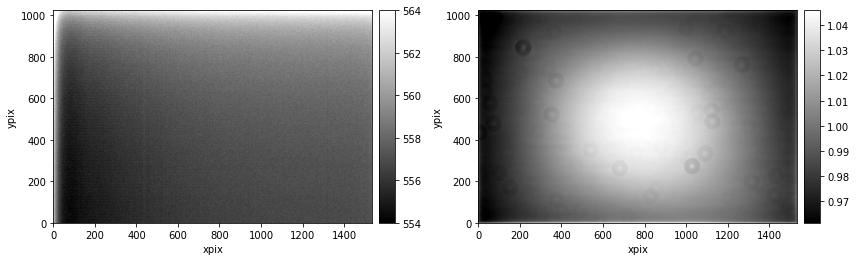

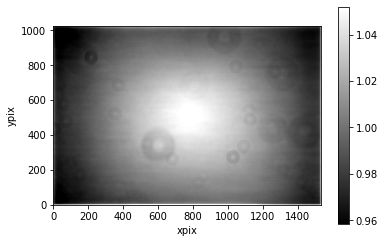

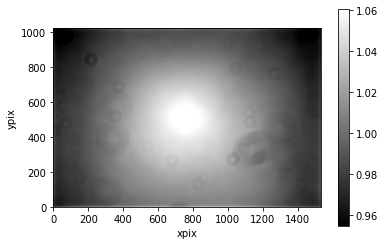

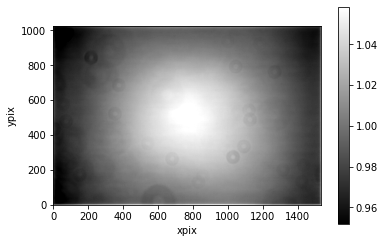

In [ ]:
# plot master and bias
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(1,2,figsize=(12,6))


lo,up = np.percentile(masterbias,1),np.percentile(masterbias,99)
fig1 = ax[0].imshow(masterbias,cmap='gray',origin='lower',clim=(lo,up))

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(fig1, cax=cax, orientation='vertical')


lo,up = np.percentile(masterflat_black,1),np.percentile(masterflat_black,99)
fig2 = ax[1].imshow(masterflat_black,cmap='gray',origin='lower',clim=(lo,up))

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(fig2, cax=cax, orientation='vertical')

#ax[0].set_title('Master Bias')
#ax[1].set_title('Master Flat, Black')

ax[0].set(xlabel='xpix', ylabel='ypix')
ax[1].set(xlabel='xpix', ylabel='ypix')

fig.tight_layout()
fig.savefig("MasterBias+Flats.pdf")

extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('MasterBias.png', bbox_inches=extent.expanded(1.37, 1.3))

extent = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('MasterFlatBlack.png', bbox_inches=extent.expanded(1.36, 1.3))

plot_image(masterflat_blue, 'gray')
plot_image(masterflat_red, 'gray')
plot_image(masterflat_green, 'gray')


In [ ]:
!pip install photutils

from photutils import Background2D,MedianBackground
from astropy.stats import SigmaClip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 826 kB 5.1 MB/s 


In [ ]:
def get_bckg_stuff(image):
    sigma_clip = SigmaClip(sigma=3.0) 
    bkg_estimator = MedianBackground()
    bkg = Background2D(image,(50,50),filter_size=(3,3),sigma_clip=sigma_clip,bkg_estimator=bkg_estimator)
    return bkg.background, bkg.background_rms

**Get Epoch of a file**

In [ ]:
# Author: Matt Davis, from http://github.com/jiffyclub

import math

def date_to_jd(year,month,day):
    if month == 1 or month == 2:
        yearp = year - 1
        monthp = month + 12
    else:
        yearp = year
        monthp = month
    
    # this checks where we are in relation to October 15, 1582, the beginning
    # of the Gregorian calendar.
    if ((year < 1582) or
        (year == 1582 and month < 10) or
        (year == 1582 and month == 10 and day < 15)):
        # before start of Gregorian calendar
        B = 0
    else:
        # after start of Gregorian calendar
        A = math.trunc(yearp / 100.)
        B = 2 - A + math.trunc(A / 4.)
        
    if yearp < 0:
        C = math.trunc((365.25 * yearp) - 0.75)
    else:
        C = math.trunc(365.25 * yearp)
        
    D = math.trunc(30.6001 * (monthp + 1))
    
    jd = B + C + D + day + 1720994.5
    
    return jd
    

def get_epoch(filepath): # em J200
    filepath = str(filepath)
    filepath_split = filepath.split("_")
    date = filepath_split[2].split("-")
    time = filepath_split[3].split("-")
    #print(date)
    #print(time)
    year =  int(date[0])
    month = int(date[1])
    day =   int(date[2])
    day_fraction = (int(time[0])*3600 + int(time[1])*60 + int(time[2]))/86400
    epoch_jd = date_to_jd(year, month, day+day_fraction)
    return epoch_jd

# get_epoch(science_black[0]) -it works!

**Reduce Images (Science)**

In [ ]:
# Write to file 

def write_to_file(filename, saveas):
  file = np.asarray(open_image(filename)[0].data)
  txtfile = open(saveas + ".txt", 'w')
  for line in file:
    for val in line:
      txtfile.write(str(val) + " ")
    txtfile.write("\n")
  txtfile.close()

write_to_file(science_black[0], 'test')

def get_filenumber(filepath):
  filepath_split = filepath.split("_")
  filenumber = filepath_split[5].split(".")[0]
  return filenumber

def get_day(filepath):
  filepath_split = filepath.split("_")
  day = filepath_split[2].split("-")[2]
  return day

print(science_black[0])
print(get_filenumber(science_black[0]))
print(get_day(science_black[0]))

https://baltasar.centra.tecnico.ulisboa.pt/~sgonzalez/LabAst_2022/2022-09-26/HIP101748_2022-09-26_21-38-11_black_0253.fits
0253
26


In [ ]:
def reduce(science, masterbias, masterflat,flats_std):
  reduced_science = []
  image_std = []
  epoch = []
  for file in science:
    image = np.asarray(open_image(file)[0].data)
    epoch.append(get_epoch(file))
    image_reduced = (image - masterbias) / masterflat
    bckg, bckg_std = get_bckg_stuff(image_reduced)
    image_reduced = image_reduced - bckg
    image_std.append(np.sqrt((image- masterbias+read_out**2)/masterflat**2+flats_std**2/(image-masterbias)**2+bckg_std**2))
    reduced_science.append(image_reduced)
    write_to_file(file, get_day(file) + "_" + get_filenumber(file))
  return reduced_science,image_std,epoch

In [ ]:
reduced_science_black,reduced_std_black,epoch_black = reduce(science_black, masterbias, masterflat_black,flats_std_black)
reduced_science_blue,reduced_std_blue,epoch_blue = reduce(science_blue, masterbias, masterflat_blue,flats_std_blue)
reduced_science_red,reduced_std_red,epoch_red = reduce(science_red, masterbias, masterflat_red,flats_std_red)
reduced_science_green,reduced_std_green,epoch_green = reduce(science_green, masterbias, masterflat_green,flats_std_green)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero

**Plot Reduced Science Images**

In [ ]:
k=0
for i in reduced_science_black:

  fig,ax = plt.subplots(1,1,figsize=(12,6))

  lo,up = np.percentile(i,1),np.percentile(i,99)
  ax.imshow(i,cmap='gray',origin='lower',clim=(lo,up))

  ax.set_title('Reduced science black %i' %k)
  k=k+1
  ax.set(xlabel='xpix', ylabel='ypix')

  k=0
for i in reduced_science_blue:

  fig,ax = plt.subplots(1,1,figsize=(12,6))

  lo,up = np.percentile(i,1),np.percentile(i,99)
  ax.imshow(i,cmap='gray',origin='lower',clim=(lo,up))

  ax.set_title('Reduced science blue %i' %k)
  k=k+1
  ax.set(xlabel='xpix', ylabel='ypix')

k=0
for i in reduced_science_green:

  fig,ax = plt.subplots(1,1,figsize=(12,6))

  lo,up = np.percentile(i,1),np.percentile(i,99)
  ax.imshow(i,cmap='gray',origin='lower',clim=(lo,up))

  ax.set_title('Reduced science green %i' %k)
  k=k+1
  ax.set(xlabel='xpix', ylabel='ypix')

k=0
for i in reduced_science_red:

  fig,ax = plt.subplots(1,1,figsize=(12,6))

  lo,up = np.percentile(i,1),np.percentile(i,99)
  ax.imshow(i,cmap='gray',origin='lower',clim=(lo,up))

  ax.set_title('Reduced science red %i' %k)
  k=k+1
  ax.set(xlabel='xpix', ylabel='ypix')



**Alignment**

In [ ]:
pip install astroalign

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
  Created wheel for astroalign: filename=astroalign-2.4.1-py3-none-any.whl size=14776 sha256=e0028d24ea758bd50eb6a841cc867b2ec39a4ddecac40d09901211335d8930d8
  Stored in directory: /root/.cache/pip/wheels/29/4a/c3/c06678708dbdfe1180f3172d01082d2676dc967cd9e105b38b
Successfully built astroalign


*Testing Alignment Function*

In [ ]:
import astroalign as aa

ind_1 = 20
ind_2 = 35
aligned_image, footprint = aa.register(reduced_science_blue[ind_1], reduced_science_blue[ind_2],detection_sigma=2) #alinha a 1a para ficar na posicao da 2a

plot_image(reduced_science_blue[ind_1], 'Blues')
plot_image(reduced_science_blue[ind_2], 'Blues')
plot_image(aligned_image, 'Blues')

Aligning all images (skipping unwanted pictures that fail to align)

In [ ]:
def align(science, filter):
  aligned_science = []
  epochs = []
  print('Aligning all images with the following image:')
  fig,ax = plt.subplots(1,1,figsize=(12,6))

  lo,up = np.percentile(science[0],1),np.percentile(science[0],99)
  ax.imshow(science[0],cmap='gray',origin='lower',clim=(lo,up))
  ax.set_title('science[0]')
  k = 0
  for i in science:
    if (filter=='black' and (k==5 or k==6 or k==7 or k==8 or k==9 or k==30 or k==38 or k==43 or k==44)): # skipping unwanted pictures
      k=k+1
      continue
    if (filter=='blue' and (k==5 or k==6 or k==7 or k==8 or k==9 or k==31 or k==33 or k==34 or k==48)):
      k=k+1
      continue
    if (filter=='red' and (k==5 or k==6 or k==7 or k==8 or k==9 or k==21 or k==22 or k==25 or k==26 or k==27)):
      k=k+1
      continue
    if (filter=='green' and (k==5 or k==6 or k==7 or k==8 or k==9 or k==25 or k==26 or k==27)):
      k=k+1
      continue

    if (filter!='blue'):
      aligned_image, footprint = aa.register(i, science[0])
    if (filter=='blue'):
      if (k<20):
        aligned_image, footprint = aa.register(i, science[0],detection_sigma=1)
        #aligned_image = i
      if (k>=20):
        aligned_image, footprint = aa.register(i, science[0],detection_sigma=0.2) # from k>20 the pictures in B are fainter
        
    fig,ax = plt.subplots(1,1,figsize=(12,6))

    lo,up = np.percentile(aligned_image,1),np.percentile(aligned_image,99)
    ax.imshow(aligned_image,cmap='gray',origin='lower',clim=(lo,up))
    
    ax.set_title('Aligned science %i' %k)
    
    ax.set(xlabel='xpix', ylabel='ypix')
    aligned_science.append(aligned_image)

    if (filter=='black'):
      epochs.append(get_epoch(science_black[k]))
    if (filter=='blue'):
      epochs.append(get_epoch(science_blue[k]))
    if (filter=='green'):
      epochs.append(get_epoch(science_green[k]))
    if (filter=='red'):
      epochs.append(get_epoch(science_red[k]))
    
    k=k+1

  return aligned_science, epochs

**Plotting all aligned and reduced images - Clear, B, V and R filters**

In [ ]:
aligned_reduced_science_black, black_epochs = align(reduced_science_black, 'black')
aligned_reduced_science_blue, blue_epochs = align(reduced_science_blue, 'blue')
aligned_reduced_science_red, red_epochs = align(reduced_science_red, 'red')
aligned_reduced_science_green, green_epochs = align(reduced_science_green, 'green')

**Estimating centroid of GO Cyg in aligned reduced images with no filter (black)**

In [ ]:
## Rough position
pos = [820,370]

In [ ]:
## Get centroid
from photutils import centroid_com, centroid_2dg  #load centroid libraries
subdata = aligned_reduced_science_black[0][pos[1]-30:pos[1]+30,pos[0]-30:pos[0]+30] #select subportion of image aligned_reduced_science_black[0]

plt.imshow(subdata,origin='lower')

center = centroid_2dg(subdata)+pos-[30,30],centroid_2dg(subdata)+pos-[30,30]
ccenter = centroid_com(subdata)+pos-[30,30],centroid_com(subdata)+pos-[30,30]
print(center)
print(ccenter)

**Find Stars - DAOStarFinder with **

In [ ]:
from astropy.stats import sigma_clipped_stats,gaussian_sigma_to_fwhm

from photutils import DAOStarFinder

mean, median, std = sigma_clipped_stats(aligned_reduced_science_black[0], sigma=3.0,maxiters=5) 
print((mean, median, std))

daofind = DAOStarFinder(fwhm=10, threshold=4.*std)

sources_black = daofind(aligned_reduced_science_black[0])
sources_blue = daofind(aligned_reduced_science_blue[0])
sources_red = daofind(aligned_reduced_science_red[0])
sources_green = daofind(aligned_reduced_science_green[0])

print("     Found %i stars in image " %len(sources_black))
print(sources_black)

(*Plot stars found*)

     Found 221 stars in image 
     Found 91 stars in image 
     Found 91 stars in image 
     Found 192 stars in image 


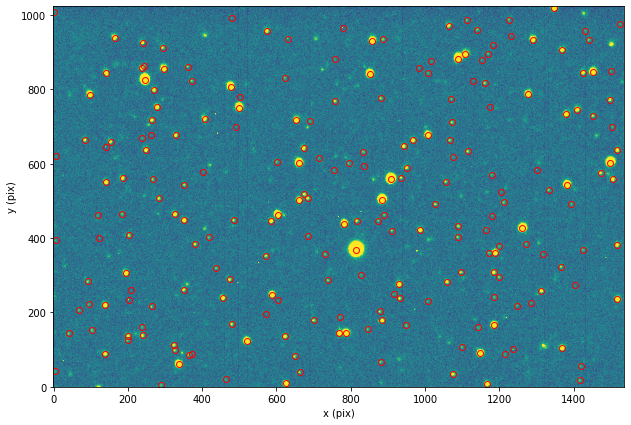

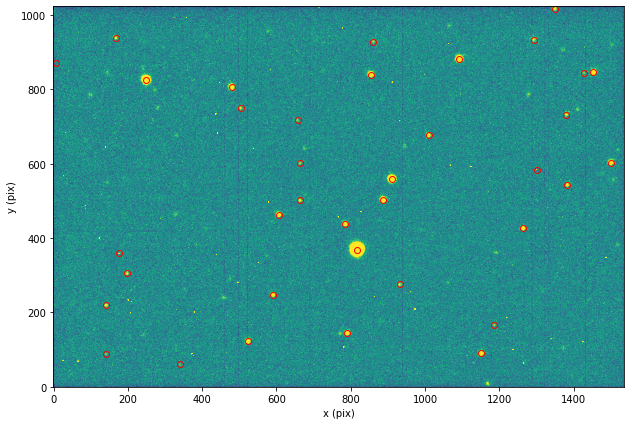

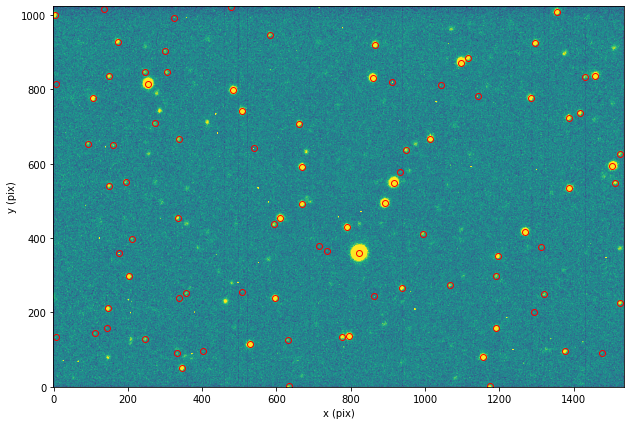

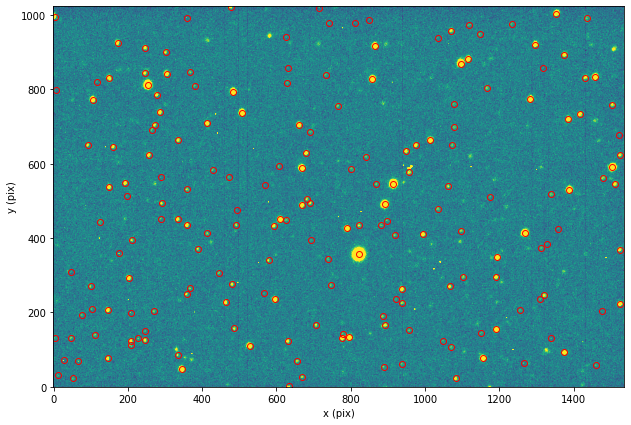

In [ ]:
## Plot stars found ## BLACK
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_black[0][np.isfinite(aligned_reduced_science_black[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_black[0][np.isfinite(aligned_reduced_science_black[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_black[0],clim=(l1,l2),origin='lower')
plt.plot(sources_black["xcentroid"],sources_black["ycentroid"],'or',mfc='none')
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

print("     Found %i stars in image " %len(sources_black))

## Plot stars found ## BLUE
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_blue[0][np.isfinite(aligned_reduced_science_blue[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_blue[0][np.isfinite(aligned_reduced_science_blue[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_blue[0],clim=(l1,l2),origin='lower')
plt.plot(sources_blue["xcentroid"],sources_blue["ycentroid"],'or',mfc='none')
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

print("     Found %i stars in image " %len(sources_green))

## Plot stars found ## GREEN
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_green[0][np.isfinite(aligned_reduced_science_green[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_green[0][np.isfinite(aligned_reduced_science_green[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_green[0],clim=(l1,l2),origin='lower')
plt.plot(sources_green["xcentroid"],sources_green["ycentroid"],'or',mfc='none')
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

print("     Found %i stars in image " %len(sources_green))

## Plot stars found ## RED
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_red[0][np.isfinite(aligned_reduced_science_red[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_red[0][np.isfinite(aligned_reduced_science_red[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_red[0],clim=(l1,l2),origin='lower')
plt.plot(sources_red["xcentroid"],sources_red["ycentroid"],'or',mfc='none')
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

print("     Found %i stars in image " %len(sources_red))

In [ ]:
nbright = 5

### BLACK ###
print('BLACK')
## Take nbright brightest stars and print list
brightest = np.argsort(sources_black['flux'])[::-1][0:nbright]
brsources_black = sources_black[brightest]

#for i,src in enumerate(brsources_black):
  #print(src)


### BLUE ###
print('BLUE')
## Take nbright brightest stars and print list
brightest = np.argsort(sources_blue['flux'])[::-1][0:nbright]
brsources_blue = sources_blue[brightest]

for i,src in enumerate(brsources_blue):
  print(src)

### RED ###
print('RED')
## Take nbright brightest stars and print list
brightest = np.argsort(sources_red['flux'])[::-1][0:nbright]
brsources_red = sources_red[brightest]

for i,src in enumerate(brsources_red):
  print(src)

### GREEN ###
print('GREEN')
## Take nbright brightest stars and print list
brightest = np.argsort(sources_green['flux'])[::-1][0:nbright]
brsources_green = sources_green[brightest]

for i,src in enumerate(brsources_green):
  print(src)



BLACK
BLUE
 id     xcentroid         ycentroid           sharpness           roundness1           roundness2       npix sky        peak              flux              mag        
--- ----------------- ------------------ ------------------- ------------------- ---------------------- ---- --- ----------------- ----------------- ------------------
 12 817.0800032412704 368.76853141463596 0.47229152679291475 0.04814067872174008 -0.0020416455227388448  169 0.0 8411.519291787214 526.8436602262859 -6.804204395838522
 id     xcentroid         ycentroid          sharpness           roundness1           roundness2     npix sky        peak              flux              mag        
--- ------------------ ---------------- ------------------- -------------------- ------------------- ---- --- ----------------- ----------------- ------------------
 28 250.13698270333396 823.851863959044 0.46351415005710855 -0.05019645684043677 0.07238287881958527  169 0.0 676.1886718300784 40.90027077513013 -4.029315

**Saving the coordinates of GO Cyg and three closest stars for differential photometry for clear, B, V and R filters**

GO CYG Coordinates =  814.8043607773843 369.3914247930209
GO CYG Coordinates =  817.0800032412704 368.76853141463596
GO CYG Coordinates =  821.7144374686444 356.1346395132799
GO CYG Coordinates =  821.9625912837041 359.45618824744207


Text(0, 0.5, 'y (pix)')

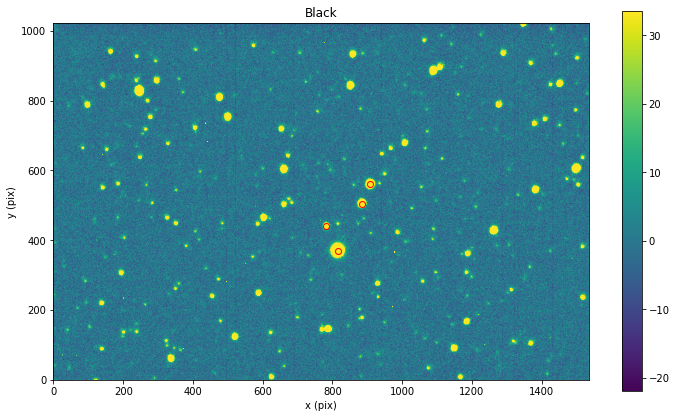

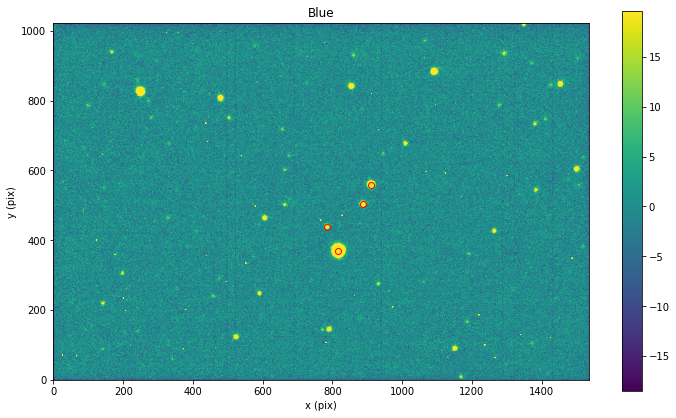

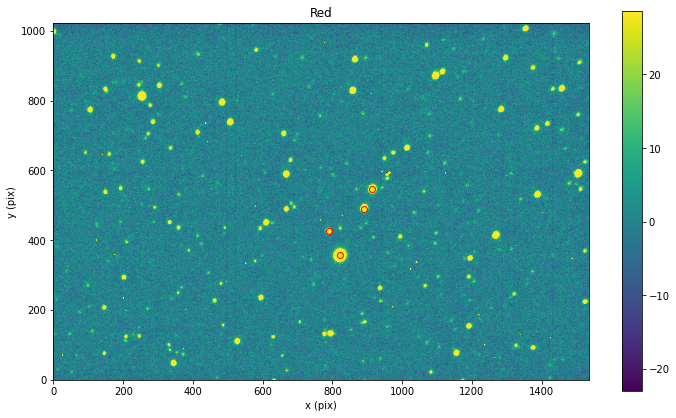

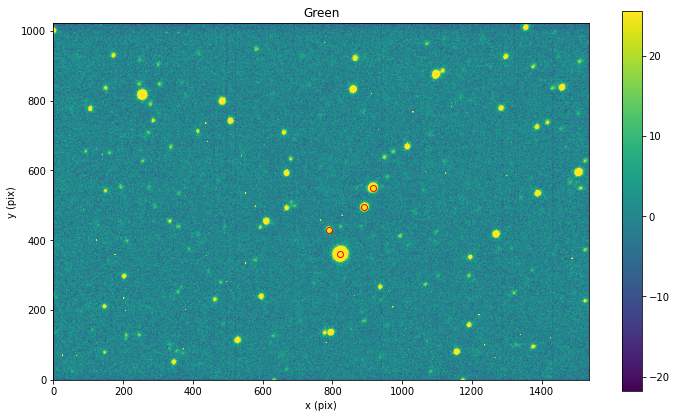

In [ ]:
coords_black =[[814.8043607773843,369.3914247930209],[884.2190540230681,504.2507482392599],[907.9630173733899,559.5780073462665], [782.5086553929111, 439.27676310879576]]
coords_blue = [[817.0800032412704, 368.76853141463596], [886.473600077419, 502.7736219065926], [910.1011490600578, 558.0122240685986], [785.0418783829039, 438.402353894504]]
coords_red = [[821.7144374686444, 356.1346395132799], [891.081672968323, 490.1692121556996], [914.6906094516726, 545.4778789764273], [789.4971336139138, 425.655343739185]]
coords_green = [[821.9625912837041, 359.45618824744207],[891.282851610546, 493.56505929811004],[915.0013246324089, 548.899818473626], [789.806153118181, 429.0101414844063]]

						
						
						

print('GO CYG Coordinates = ', coords_black[0][0],coords_black[0][1])

## Plot go cyg and stars for diff photometry
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_black[0][np.isfinite(aligned_reduced_science_black[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_black[0][np.isfinite(aligned_reduced_science_black[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_black[0],clim=(l1,l2),origin='lower')
plt.plot(np.transpose(coords_black)[0],np.transpose(coords_black)[1],'or',mfc='none')
plt.title('Black')
plt.colorbar()
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")


print('GO CYG Coordinates = ', coords_blue[0][0],coords_blue[0][1])

## Plot go cyg and stars for diff photometry
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_blue[0][np.isfinite(aligned_reduced_science_blue[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_blue[0][np.isfinite(aligned_reduced_science_blue[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_blue[0],clim=(l1,l2),origin='lower')
plt.plot(np.transpose(coords_blue)[0],np.transpose(coords_blue)[1],'or',mfc='none')
plt.title('Blue')
plt.colorbar()
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")


print('GO CYG Coordinates = ', coords_red[0][0],coords_red[0][1])

## Plot go cyg and stars for diff photometry
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_red[0][np.isfinite(aligned_reduced_science_red[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_red[0][np.isfinite(aligned_reduced_science_red[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_red[0],clim=(l1,l2),origin='lower')
plt.plot(np.transpose(coords_red)[0],np.transpose(coords_red)[1],'or',mfc='none')
plt.title('Red')
plt.colorbar()
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")


print('GO CYG Coordinates = ', coords_green[0][0],coords_green[0][1])

## Plot go cyg and stars for diff photometry
fig = plt.figure(figsize=(12,7))
l1 = np.percentile(aligned_reduced_science_green[0][np.isfinite(aligned_reduced_science_green[0])].flatten(), 1)
l2 = np.percentile(aligned_reduced_science_green[0][np.isfinite(aligned_reduced_science_green[0])].flatten(), 99)
plt.imshow(aligned_reduced_science_green[0],clim=(l1,l2),origin='lower')
plt.plot(np.transpose(coords_green)[0],np.transpose(coords_green)[1],'or',mfc='none')
plt.title('Green')
plt.colorbar()
plt.xlabel("x (pix)")
plt.ylabel("y (pix)")

**Gaussian fit to GO Cyg data to find FWHM for each filter**

In [ ]:
brsources = [brsources_black, brsources_blue, brsources_red, brsources_green]

filters_fwhm = []

for brsource in brsources:
  ## Fit the Gaussian PSF to brightest stars
  rmax = 25
  (ny,nx) = np.shape(aligned_reduced_science_black[0])
  from astropy.modeling import models,fitting
  fit_g = fitting.LevMarLSQFitter()
  allxfwhm, allyfwhm = np.zeros(len(brsource)),np.zeros(len(brsource))
  allfwhm,alltheta = np.zeros(len(brsource)),np.zeros(len(brsource))
  for i,src in enumerate(brsource):
    if int(src['ycentroid']) > rmax and int(src['ycentroid']) < ny-rmax and \
      int(src['xcentroid']) > rmax and int(src['xcentroid']) < nx-rmax:
      img = aligned_reduced_science_black[0][int(src['ycentroid'])-rmax:int(src['ycentroid'])+rmax,
                  int(src['xcentroid'])-rmax:int(src['xcentroid'])+rmax]
      subx,suby = np.indices(img.shape) # instead of meshgrid
      p_init = models.Gaussian2D(amplitude=np.max(img),x_mean=rmax,y_mean=rmax,x_stddev=1.0,y_stddev=1.0)
      fitgauss = fit_g(p_init, subx, suby, img - np.min(img))
      allxfwhm[i] = np.abs(fitgauss.x_stddev.value)
      allyfwhm[i] = np.abs(fitgauss.y_stddev.value)
      allfwhm[i] = 0.5*(allxfwhm[i]+allyfwhm[i])
      alltheta[i] = fitgauss.theta.value
  xfwhm,yfwhm = np.median(allxfwhm)*gaussian_sigma_to_fwhm,np.median(allyfwhm)*gaussian_sigma_to_fwhm
  fwhm = np.median(allfwhm)*gaussian_sigma_to_fwhm
  sigfwhm, sigxfwhm, sigyfwhm = np.std(allfwhm), np.std(allxfwhm), np.std(allyfwhm)
  medtheta = np.median(alltheta)
  print("     x-FWHM %f +/- %f (pix) for this image " %(xfwhm,sigxfwhm))
  print("     y-FWHM %f +/- %f (pix) for this image " %(yfwhm,sigyfwhm))
  print("     FWHM %f +/- %f (pix) for this image " %(fwhm,sigfwhm))
  filters_fwhm.append([fwhm,sigfwhm])

print(filters_fwhm)

     x-FWHM 9.136546 +/- 0.127666 (pix) for this image 
     y-FWHM 9.347882 +/- 0.148000 (pix) for this image 
     FWHM 9.244998 +/- 0.123902 (pix) for this image 
     x-FWHM 9.136394 +/- 0.635725 (pix) for this image 
     y-FWHM 9.347891 +/- 0.345005 (pix) for this image 
     FWHM 9.245006 +/- 0.483539 (pix) for this image 
     x-FWHM 9.290254 +/- 1.600542 (pix) for this image 
     y-FWHM 9.192444 +/- 1.616650 (pix) for this image 
     FWHM 9.287887 +/- 1.606724 (pix) for this image 
     x-FWHM 9.140263 +/- 1.966454 (pix) for this image 
     y-FWHM 9.343293 +/- 1.986378 (pix) for this image 
     FWHM 9.241778 +/- 1.976185 (pix) for this image 
[[9.244997648254587, 0.12390152912061754], [9.245005987700686, 0.48353869149821604], [9.287887388205178, 1.6067241331070363], [9.241777585900744, 1.9761852856874138]]


**Obtaining magnitude of GO Cyg + three stars for differential photometry over time, using their coordinates**

In [ ]:
# save the magnitudes of the 4 stars over time

def magnitudes (filter, nbright, science, coords, filter_fwhm, filter_fwhm_err):

  magnitudes = []
  magnitudes_minuserror = []
  n = 0
  
  
  for i in science:


    mean, median, std = sigma_clipped_stats(science[0], sigma=3.0,maxiters=5)

    daofind = DAOStarFinder(fwhm=filter_fwhm, threshold=5.*std)
    daofind_minuserror = DAOStarFinder(fwhm=(filter_fwhm-filter_fwhm_err), threshold=5.*std) #CHANGED TO 5STD INSTEAD OF 4STD


    sources = daofind(i)
    sources_minuserror = daofind_minuserror(i)


  
    brightest = np.argsort(sources['flux'])[::-1][0:30]
    brightest_minuserror = np.argsort(sources_minuserror['flux'])[::-1][0:30]

    brsources = sources[brightest]
    brsources_minuserror = sources_minuserror[brightest_minuserror]

    
    aux1 = []
    aux2 = []
    
    
    
    for j,src in enumerate(brsources):
      for k in range(len(coords)):
        if (abs(round(src['xcentroid'])-round(coords[k][0]))<=6 and abs(round(src['ycentroid'])-round(coords[k][1]))<=6):
          print((round(src['xcentroid']),round(coords[k][0])),(round(src['ycentroid']),round(coords[k][1])))
          aux1.append(float(src['mag']))
          print('mag =', float(src['mag']))
        
    magnitudes.append(aux1)

    # calculate bottom error bar -> we'll take the lower bound instead of the upper one, which works fine
    for j,src in enumerate(brsources_minuserror):
      for k in range(len(coords)):
        if (abs(round(src['xcentroid'])-round(coords[k][0]))<=5 and abs(round(src['ycentroid'])-round(coords[k][1]))<=5):
          aux2.append(float(src['mag']))
          #print('black_magnitudes_minuserror =', float(src['mag']))        
    
    magnitudes_minuserror.append(aux2)

  return magnitudes, magnitudes_minuserror


black_magnitudes, black_magnitudes_minuserror = magnitudes('black',30, aligned_reduced_science_black, coords_black, filters_fwhm[0][0], filters_fwhm[0][1])

blue_magnitudes, blue_magnitudes_minuserror = magnitudes('blue',30, aligned_reduced_science_blue, coords_blue, filters_fwhm[1][0], filters_fwhm[1][1])

red_magnitudes, red_magnitudes_minuserror = magnitudes('red',30, aligned_reduced_science_red, coords_red, filters_fwhm[2][0], filters_fwhm[2][1])

green_magnitudes, green_magnitudes_minuserror = magnitudes('green',30, aligned_reduced_science_green, coords_green, filters_fwhm[3][0], filters_fwhm[3][1])

(815, 815) (369, 369)
mag = -7.414790718259205
(908, 908) (558, 560)
mag = -5.019467505800732
(884, 884) (503, 504)
mag = -4.515145922295912
(782, 783) (438, 439)
mag = -3.1995776956303423
(814, 815) (369, 369)
mag = -7.068539266033962
(907, 908) (558, 560)
mag = -4.5852874000901975
(884, 884) (503, 504)
mag = -4.051044970161395
(782, 783) (438, 439)
mag = -2.731960750054519
(814, 815) (369, 369)
mag = -7.2596132711572
(907, 908) (558, 560)
mag = -4.864359752716298
(884, 884) (503, 504)
mag = -4.3144909141077505
(782, 783) (438, 439)
mag = -2.992546961513799
(814, 815) (369, 369)
mag = -7.664132137373944
(907, 908) (558, 560)
mag = -5.239300147760088
(884, 884) (503, 504)
mag = -4.702936760282503
(782, 783) (438, 439)
mag = -3.3708124964590693
(814, 815) (369, 369)
mag = -7.5473689648829225
(908, 908) (558, 560)
mag = -5.118353133465668
(884, 884) (503, 504)
mag = -4.599463919266947
(782, 783) (438, 439)
mag = -3.2721974007736634
(815, 815) (370, 369)
mag = -6.2704505858397495
(908, 90

"blue_magnitudes, blue_magnitudes_minuserror = magnitudes('blue',30, aligned_reduced_science_blue, coords_blue, filters_fwhm[1][0], filters_fwhm[1][1])\n#print('*****',blue_magnitudes)\n\nred_magnitudes, red_magnitudes_minuserror = magnitudes('red',30, aligned_reduced_science_red, coords_red, filters_fwhm[2][0], filters_fwhm[2][1])\n#print('*****',red_magnitudes)\n\ngreen_magnitudes, green_magnitudes_minuserror = magnitudes('green',30, aligned_reduced_science_green, coords_green, filters_fwhm[3][0], filters_fwhm[3][1])\n#print('*****',green_magnitudes)"

**Printing computed values for epochs, magnitudes and magnitudes calculated when inputting fwhm-err(fwhm) in DAOStarFinder**

In [ ]:
"""print('**BLACK**')
print(black_epochs)
print(black_magnitudes)
print(black_magnitudes_minuserror)

print('**BLUE**')
print(blue_epochs)
print(blue_magnitudes)
print(blue_magnitudes_minuserror)

print('**RED**')
print(red_epochs)
print(red_magnitudes)
print(red_magnitudes_minuserror)"""

print('**GREEN**')
print(green_epochs)
print(green_magnitudes)
print(green_magnitudes_minuserror)

[2459849.4058217593, 2459849.406087963, 2459849.4063541666, 2459849.406608796, 2459849.406875, 2459850.3133680555, 2459850.313634259, 2459850.313900463, 2459850.3141550925, 2459850.314421296, 2459850.3710995372, 2459850.371365741, 2459850.3716203705, 2459850.371886574, 2459850.372152778, 2459850.447395833, 2459850.447662037, 2459850.4479282405, 2459850.4481828706, 2459850.4484490743, 2459851.427638889, 2459851.4279050925, 2459851.3065046296, 2459851.306770833, 2459851.307025463, 2459851.3072916665, 2459851.3075578706, 2459852.393090278, 2459852.3933449076, 2459852.393611111, 2459852.393877315, 2459852.3941319445, 2459852.394398148, 2459852.394664352, 2459852.3949189815, 2459852.395185185, 2459852.395451389, 2459852.3027314814, 2459852.302997685, 2459852.3032638887, 2459852.303518519, 2459852.3037847225]
[[-6.665635707002323, -3.9723640478063, -3.329723403751071, -2.0939134542893827], [-6.962515352568679, -4.277119868106016, -3.6219765073833172, -2.4265862581744684], [-7.630876103451566

**Stacking of Equivalent Shots**

In [ ]:
def stacking(magnitudes,epochs,errors):
  indices = []
  for i in range(len(epochs)-1):
    if (abs(epochs[i]-epochs[i+1])>0.01):
      indices.append(i)
  #print(indices)
  indices.append(len(epochs)-1)
  stacked_magnitudes = []
  stacked_epochs = []
  stacked_errors = []
  
  #print(np.sum(magnitudes[0:indices[0]+1])/(indices[0]+1))
  stacked_magnitudes.append(np.sum(magnitudes[0:indices[0]+1])/(indices[0]+1)) #correct
  stacked_epochs.append(np.sum(epochs[0:indices[0]+1])/(indices[0]+1))
  stacked_errors.append(np.sum(errors[0:indices[0]+1])/(indices[0]+1))
  aux = []
  for i in range(len(indices)-1):
    a = [indices[i]+1,indices[i+1]]
    aux.append(a)

  indices = aux
  #print(indices)
  #print(len(indices))

  for indice_low, indice_high in indices:
    
    stacked_magnitudes.append(np.mean(magnitudes[indice_low:indice_high+1]))
    stacked_epochs.append(np.mean(epochs[indice_low:indice_high+1]))
    stacked_errors.append(np.mean(errors[indice_low:indice_high+1]))


  return(stacked_magnitudes, stacked_epochs,stacked_errors)

In [ ]:
### BLACK ###

stacked_black_magnitudes = []
stacked_black_errors = []

## the magnitudes of the stars with each filter were saved to a csv and then copied to here in order to avoid running the whole code each time
black_magnitudes = [[-7.657065750779346, -5.261742538320872, -4.757420954816053, -3.441852728150483], [-7.310814298554103, -4.827562432610339, -4.293320002681536, -2.9742357825746604], [-7.50188830367734, -5.106634785236438, -4.556765946627891, -3.23482199403394], [-7.906407169894084, -5.481575180280228, -4.945211792802644, -3.61308752897921], [-7.789643997403064, -5.360628165985808, -4.841738951787088, -3.514472433293804], [-6.5192608703500206, -4.362856368220072, -3.827089940727264, -2.4508946896325674], [-7.235155840880875, -5.049387859857992, -4.519319533275473, -3.216405941914279], [-7.077496738740157, -4.945003629790383, -4.38526895945421, -3.065206477683873], [-7.782154891993028, -5.623545079335434, -5.098296570900491, -3.735114208372389], [-7.468757859817929, -5.319535140161602, -4.813639938512669, -3.4180073027037565], [-7.735463336366136, -5.589136222483414, -5.048615493037634, -3.7097066994695167], [-7.700407228283871, -5.540207325841726, -5.033623430683115, -3.6763704452451993], [-7.441281038673676, -5.312362518043678, -4.81498170354884, -3.4325203282682715], [-7.522367257693922, -5.333069070206244, -4.8489287686680065, -3.4841925941703367], [-7.604348340461817, -5.455432336285135, -4.932839214778391, -3.5997015391302316], [-7.213931720777263, -5.321405014486452, -4.798985987378916, -3.472779519775477], [-7.291830239588234, -5.385105491325724, -4.915295539617571, -3.5250718589581647], [-7.235490761996562, -5.362503885291949, -4.850519897332717, -3.454118519219268], [-7.268187290041185, -5.415526653608108, -4.890833879061527, -3.490310770402184], [-6.8671396384897445, -5.024581099238057, -4.510589796888409, -3.0862416841997775], [-7.143788020409827, -5.228250063585744, -4.728696477585709, -3.3615770419983737], [-7.299306039725517, -5.503381338751973, -4.943101797077899, -3.5490072095574594], [-7.316003087239899, -5.409928336811822, -4.905004577560223, -3.550676922276128], [-7.144278643321174, -5.255616632165378, -4.723439781547955, -3.334220309144448], [-6.881887171531519, -5.016084959332401, -4.457393309232749, -3.092713701761997], [-6.897339887004455, -4.605738995797044, -4.060917753130621, -2.7162278014800574], [-7.28118697276391, -5.024875062700957, -4.466233586328535, -3.153089320442227], [-7.282431194021046, -5.054713999965745, -4.514950106789851, -3.149767513467026], [-6.984862567137771, -4.7522976856325885, -4.178728594668593, -2.847844445743389], [-6.064726011416084, -3.762038672431684, -3.166473530359235, -2.0049414859637262], [-7.1586358833530905, -4.927237153674447, -4.384696610433826, -3.011631219096704], [-7.0457389922921045, -4.683527953946512, -4.210382247771158, -2.9022819677146656], [-6.275510967609929, -3.9342063628106505, -3.5559864592197927, -2.2245686637008086], [-7.017716451478202, -4.895580011016312, -4.39225256907558, -2.98995122053722], [-8.02997127170621, -5.893202963976625, -5.365963864940259, -3.9907141650339133], [-7.188564372523514, -5.088915733016126, -4.591902127180954, -3.189857739192577], [-7.506209800583081, -5.015285987024654, -4.537340467906125, -3.1905372679728483], [-8.361245982668407, -5.889137459313107, -5.369156154646234, -4.048315064349963], [-8.404640453528891, -5.932103022726917, -5.4445462718600055, -4.145919978173646], [-8.354255356958918, -5.877825389245635, -5.33777701866064, -4.020805854880878], [-8.364983992467522, -5.884684727670638, -5.365063758991112, -4.073343554857319], [-8.340434158659658, -5.86078970823964, -5.369907434392832, -4.057059319659161], [-8.200772939987205, -5.729501977233415, -5.212472686815373, -3.9216490342853687], [-8.354580930961928, -5.881414903267151, -5.359198811603946, -4.038689546555446], [-8.34627743539832, -5.85468063745759, -5.340873615606416, -4.009730949014529], [-8.328914806022196, -5.877855156359415, -5.349848907687896, -4.003280396435916], [-8.414379499654615, -5.919761431359987, -5.414324063785681, -4.100425880774575], [-7.994974225737365, -5.629288185103299, -5.079881567827483, -3.736709810903689], [-8.292647398211553, -5.955415947920665, -5.398473757776625, -4.01626039568921], [-8.36038959993076, -5.984661174814203, -5.47755784467239, -4.100064535125089], [-8.199084524917765, -5.867894576759387, -5.313219641546711, -3.925845305089701], [-8.026558391685976, -5.69182555653663, -5.145485011977171, -3.7703748573689104], [-8.160384606754668, -5.796295013782398, -5.295733251599977, -3.9197068764595295], [-8.247170859492956, -5.886889601947104, -5.324307259184483, -3.961942153557763], [-8.208384886399166, -5.844506994359645, -5.308359622128226, -3.946313909738458], [-8.109732547210127, -5.774627590164961, -5.250553304013502, -3.8511115691644338], [-8.088763062274564, -5.788532868015325, -5.2087842471300085, -3.8283648887333204], [-8.203027987697753, -5.859415440479544, -5.301921453750568, -3.9108046579626365], [-8.092646196146344, -5.7479495177597295, -5.210605279045383, -3.828330962958103], [-8.098352458453087, -5.746404332643136, -5.200396517901802, -3.8179641491941405], [-8.10314898814684, -5.761586547546353, -5.244130725030668, -3.867995454927841], [-7.695220259539451, -5.266881798779641, -4.750201248099295, -3.475321626830876], [-7.5835678320942606, -5.108848394044586, -4.603541750902878, -3.3236982550012337], [-7.513629184273657, -5.027790752505289, -4.507494217113693, -3.195615885529594], [-7.96043414539949, -5.464393493997985, -4.987015440480303, -3.6273206805374962], [-8.24761207500567, -5.774395267105492, -5.265689008711005, -3.9259496690670552], [-8.325631270685603, -5.836215786716499, -5.315059552227483, -4.036139354564176], [-8.32567218641698, -5.854333418034948, -5.36813147423866, -4.023480565747325], [-8.25284898477854, -5.758791096591787, -5.265907238157599, -3.968740251416329], [-8.338870330781212, -5.835602451807144, -5.328414870466851, -4.039400587132366], [-8.225772316664825, -5.765059314402228, -5.251275763415176, -3.968038205919367], [-8.198467300489297, -5.713023868219743, -5.230753792128588, -3.90633353346906], [-8.244199991412966, -5.772432277148402, -5.261321943835718, -3.956246947453643], [-8.174183592879803, -5.671286709381348, -5.177838783158606, -3.8882157849573824], [-8.241642068611183, -5.751746409452752, -5.224588849106783, -3.9531809994202516]]
black_magnitudes = np.transpose(black_magnitudes)

black_epochs = [2459849.401516204, 2459849.4016666664, 2459849.4018171295, 2459849.4019675925, 2459849.4021064816, 2459850.3080787035, 2459850.3082291665, 2459850.3083680556, 2459850.3085185187, 2459850.3086689813, 2459850.3088078704, 2459850.3089583335, 2459850.3091087965, 2459850.309259259, 2459850.309398148, 2459850.3664930556, 2459850.3666319447, 2459850.3667824073, 2459850.3669328704, 2459850.3670833334, 2459850.3672222225, 2459850.367372685, 2459850.367523148, 2459850.367662037, 2459850.3678125, 2459850.442060185, 2459850.442210648, 2459850.442361111, 2459850.4425, 2459850.442650463, 2459850.442800926, 2459850.4429398146, 2459850.443240741, 2459851.422650463, 2459851.4229166666, 2459851.4231712963, 2459851.29931713, 2459851.300648148, 2459851.3007870372, 2459851.3009375, 2459851.301087963, 2459851.301226852, 2459851.301377315, 2459851.3015277777, 2459851.3016782408, 2459851.3018171294, 2459851.3019675924, 2459852.3851851854, 2459852.3855324076, 2459852.385763889, 2459852.3859837963, 2459852.386631944, 2459852.3867824073, 2459852.3869328704, 2459852.3870717594, 2459852.387222222, 2459852.387372685, 2459852.387511574, 2459852.3876620373, 2459852.3878125, 2459852.387951389, 2459852.292280093, 2459852.29306713, 2459852.293298611, 2459852.2945138887, 2459852.295509259, 2459852.2956597223, 2459852.2958101854, 2459852.295949074, 2459852.296099537, 2459852.29625, 2459852.2963888887, 2459852.296539352, 2459852.296689815, 2459852.296828704]
black_epochs = np.transpose(black_epochs)

black_magnitudes_minuserror = [[-7.595224900817636, -5.204093534930729, -4.703507119502278, -3.3849818484655474], [-7.240164999604312, -4.751131502193406, -4.218842266014833, -2.896653891422724], [-7.427815797365504, -5.041994305717195, -4.490211067748372, -3.1662041543574975], [-7.850949640567042, -5.427872888707608, -4.894210098314139, -3.564069967712164], [-7.726729934168491, -5.301687636079407, -4.785112616508616, -3.4611503967352437], [-6.431091680538975, -4.276575833671353, -3.747295522025538, -2.3822842058271734], [-7.171468730293787, -4.98207847862857, -4.454779295186758, -3.1595112569624244], [-7.0016111591447485, -4.872025483494481, -4.315187837179111, -3.0061292800500308], [-7.734863028172675, -5.580119516013948, -5.0537591388493635, -3.6951484650554], [-7.410578254974709, -5.265625695684947, -4.760357253705188, -3.3655023337838417], [-7.685917321050764, -5.5424125808873494, -5.001063534174617, -3.6638398896754327], [-7.649522459674648, -5.4938174778636375, -4.987352153785095, -3.6262650896683093], [-7.379149734801992, -5.254750141471143, -4.761622475260053, -3.3709181630372367], [-7.468118518112995, -5.281176728605113, -4.797398598329233, -3.4284125305905473], [-7.55290119551205, -5.406232681072306, -4.881812021361415, -3.548633912810372], [-7.160778546193915, -5.266066039155492, -4.750868887113689, -3.4176100896595454], [-7.239143331992878, -5.335003000285701, -4.867686630490354, -3.4774234846916627], [-7.179501331628791, -5.310257915711002, -4.805657433415698, -3.407612932608912], [-7.215440649207845, -5.365853819220362, -4.845706838501387, -3.4317895336705915], [-6.798494517730837, -4.959184056681037, -4.449447698566741, -3.027009499199191], [-7.0846116131538235, -5.167801095005601, -4.675340705402173, -3.306437229814377], [-7.252486268441912, -5.457843305451654, -4.902098244589672, -3.5048154656866775], [-7.264690540079722, -5.359996609726578, -4.859126300465544, -3.5129423949971783], [-7.088211324491106, -5.199964044219819, -4.675070487420323, -3.2862921604092366], [-6.817555836985746, -4.956690639768915, -4.399757119547121, -3.033882465708318], [-6.829151101194519, -4.541525344206811, -3.998208928623047, -2.6492579141393464], [-7.2138414332764995, -4.963993252732276, -4.395620099557805, -3.090759050784052], [-7.214988806857923, -4.992238243491321, -4.453472281515679, -3.0958021423441817], [-6.915170646832065, -4.6828892009391225, -4.113813206336533, -2.7664055836936656], [-5.984016523268395, -3.6828344349614675, -3.086228472998775, -1.9351063559045067], [-7.090644020339861, -4.866898890956008, -4.321206891797026, -2.944976774625748], [-6.969966509143561, -4.608056231496221, -4.146431656751075, -2.82917961435884], [-6.197901106323434, -3.8549780917768772, -3.490344535362153, -2.183230568458434], [-6.9595121057690275, -4.842689657688015, -4.338775334995847, -2.9313333006293805], [-7.990582638380967, -5.855189317109398, -5.332986874537263, -3.939956280719783], [-7.139888555965071, -5.04736888311486, -4.552084475220026, -3.146148451377519], [-7.472466826600006, -4.981471325601489, -4.514135708683318, -3.1619447347766734], [-8.336745852912845, -5.865227296831545, -5.347242837547571, -4.029246522740925], [-8.38310855553237, -5.91576951898865, -5.426763889226997, -4.1287370768774325], [-8.32969744226645, -5.854984659371332, -5.311064929424551, -3.996092371295009], [-8.340554471747263, -5.861918414506357, -5.343762848552313, -4.054729456405482], [-8.313174335799129, -5.835083868983954, -5.346260728034254, -4.034741967021696], [-8.167614141578628, -5.695132617421645, -5.178262503109278, -3.896180731460408], [-8.324699610856408, -5.856278879368977, -5.333192608557268, -4.01588943332335], [-8.317360884771437, -5.8287729481887425, -5.312552943862361, -3.98685701878908], [-8.299273509245623, -5.852027637686254, -5.32654020335932, -3.9747671819115156], [-8.389362102929939, -5.894633933818007, -5.394060657605966, -4.083614666763124], [-7.948048789462767, -5.587646832614611, -5.03921839578696, -3.6932162268754536], [-8.26353000813908, -5.934134065940409, -5.375613763997636, -3.992164041451943], [-8.338069005426396, -5.960881600693399, -5.460477079964276, -4.0737824097664594], [-8.164708139847265, -5.836143079192367, -5.290792673547765, -3.8938618337291864], [-7.983702557872009, -5.652914777913519, -5.112746394431207, -3.7298377693863487], [-8.132448701641671, -5.769671886475408, -5.273544947417468, -3.8885724634013585], [-8.212535107545513, -5.855612829592554, -5.29472924801735, -3.9291244680154076], [-8.180215833210804, -5.8166893314804105, -5.284005675910876, -3.9213614772851724], [-8.073599600420302, -5.742876816312563, -5.225591111629793, -3.819743272606205], [-8.049181343241663, -5.75725178946167, -5.179826840297165, -3.796974662918327], [-8.174112677683636, -5.832817223948393, -5.278333398932881, -3.882895887414951], [-8.05449429683041, -5.715274791077922, -5.179584942467992, -3.794734216929637], [-8.06224092278681, -5.713848677062581, -5.169793933927787, -3.7801951986592868], [-8.062757149624236, -5.725076905534426, -5.215810036632531, -3.835120248613742], [-7.668715537370339, -5.248417193457576, -4.72695813948789, -3.456173053663209], [-7.550480793752152, -5.074709264121491, -4.575896566905029, -3.291720342504168], [-7.482332691552306, -5.000511927825753, -4.480829968196344, -3.1774538734863804], [-7.927848648857853, -5.439921689897247, -4.958866466119215, -3.6013818912118554], [-8.223114225847148, -5.747750493214465, -5.242101638828469, -3.901763678662472], [-8.304200007685182, -5.818002065199954, -5.291484440848656, -4.011098430650886], [-8.293603121172646, -5.828257733960611, -5.342736515235071, -3.9991359077138187], [-8.227216239758919, -5.735272289630641, -5.240237626048137, -3.942368774982034], [-8.317348054983588, -5.815302726358793, -5.304584536319311, -4.015690722928713], [-8.194094796603986, -5.737848160734551, -5.223801373941975, -3.9407381859752535], [-8.171879734039788, -5.691356082082382, -5.202301244879539, -3.8792504056085937], [-8.215270457020093, -5.745138961032884, -5.234914092643734, -3.9332107251130943], [-8.141711320054455, -5.640714188095661, -5.146140100186275, -3.8592108707314896], [-8.216918130618879, -5.728188577197191, -5.2050530354178335, -3.9231034862991185]]
black_magnitudes_minuserror = np.transpose(black_magnitudes_minuserror)

black_errors = black_magnitudes_minuserror - black_magnitudes

for i in range(len(black_magnitudes)):
  mag, epoch, err = stacking(black_magnitudes[i],black_epochs,black_errors[i])
  stacked_black_magnitudes.append(mag)
  stacked_black_errors.append(err)
stacked_black_epochs = epoch

### BLUE ###

stacked_blue_magnitudes = []
stacked_blue_errors = []

blue_magnitudes = [[-6.885608733934344, -3.659929320216973, -2.481704088791705, -1.6652379534079975], [-6.861743747880251, -3.5700544733401065, -2.356540332626361, -1.6571359617276618], [-6.931663034584606, -3.6085904570901324, -2.4553520204987067, -1.6516211643517642], [-7.060094022717185, -3.7965314515931574, -2.608671781416534, -1.8395536256734968], [-6.749443129530831, -3.479443338168183, -2.3679589050689915, -1.5299202010970823], [-6.90712440171286, -4.127988912687375, -2.9458457503346116, -2.048141023615837], [-6.629646249956076, -3.838229951315319, -2.6643085118451664, -1.7483514795445236], [-6.66576478232305, -3.926689426124411, -2.681894980580325, -1.7399911794718372], [-6.744531449169409, -3.9976874028487974, -2.826302820552752, -1.9392840105839455], [-6.261882716395797, -3.4637944175637667, -2.238130014563793, -1.4210697440067062], [-6.849868837161418, -4.109840153991656, -2.9718531867450793, -2.212461505112323], [-7.0754398138839445, -4.307022794961539, -3.1956129090505163, -2.414475851677423], [-7.102763891078487, -4.342081169420608, -3.1518925623321654, -2.460530869511077], [-6.979942437883997, -4.221617701710746, -3.0858594467373157, -2.3029797967756167], [-6.898011039341418, -4.137750914237864, -2.9978550925757497, -2.2180777586770346], [-6.401244982206517, -3.1851289186409746, -2.062098368517699, -1.3752335691793371], [-5.659683803605297, -2.48222224825613, -1.3321173381653484, -0.6921914843759747], [-5.301586955767835, -2.1417732465603425, -0.9015340937078588, -0.5625383665372511], [-4.815119416083537, -1.7319456050390696, -1.1532527283367445, -0.5282917907645073], [-5.6224645220131455, -2.3601175016970934, -1.2606252423400255, -0.5961808985917451], [-7.072079044976988, -3.9665252951134464, -2.892524465370304, -2.0764190066515438], [-7.035602272509868, -3.915697277007907, -2.7810642854191974, -1.8908509484964848], [-7.136616288044738, -4.038693417804348, -2.8957786940838, -2.0438600481149862], [-7.295617987342913, -4.191211908712332, -3.029589492839925, -2.2337539082399487], [-7.302724342233995, -4.198109038183327, -3.0607561936855388, -2.2845870552438656], [-7.994551683641901, -4.971808723190984, -3.7858016239684704, -2.9048398902368344], [-8.020462721295758, -5.002242566626444, -3.8143111906175786, -2.884203752683976], [-8.006187396514257, -4.7228503045211, -3.6043516777735674, -2.8727998550325924], [-7.855475686022824, -4.571485272596535, -3.450897080557968, -2.694873852476557], [-8.020283000223412, -4.710899702426087, -3.6072837504299886, -2.7899875165338486], [-7.92564579230825, -4.6334123158348675, -3.4802941820286826, -2.7327039074867923], [-7.947928901297129, -4.646676585456391, -3.5154757873311917, -2.741325440029066], [-7.983709911138426, -4.688697447919149, -3.543184458184263, -2.7736190086553787], [-7.897130297829859, -4.598992934152312, -3.4473054794446707, -2.7080337961287855], [-7.707808040300417, -4.403328866423246, -3.257056222869132, -2.450633896567533], [-7.728003497515463, -4.4582609958722195, -3.315225537532227, -2.510668083776626], [-7.859371577858205, -4.575897488171829, -3.40716619661538, -2.6512338564996503], [-7.515812522236503, -4.491801906932054, -3.2981391632877832, -2.4521402819733016], [-7.585872324790749, -4.561314189467701, -3.395437717694864, -2.777091027925018], [-7.5380134523525255, -4.5157445230862505, -3.324498181854622, -2.883416482843141], [-7.565634118955854, -4.541320734104705, -3.3770469385919215, -3.001589452468263]]
blue_magnitudes = np.transpose(blue_magnitudes)

blue_epochs = [2459849.403148148, 2459849.403715278, 2459849.4040277777, 2459849.404351852, 2459849.404675926, 2459850.310925926, 2459850.311238426, 2459850.3115625, 2459850.311886574, 2459850.312199074, 2459850.3685300928, 2459850.368854167, 2459850.3691782407, 2459850.369490741, 2459850.369814815, 2459850.4448726852, 2459850.4451851854, 2459850.445509259, 2459850.4458333333, 2459850.4461458335, 2459851.4288194445, 2459851.429074074, 2459851.429340278, 2459851.4296064815, 2459851.429861111, 2459851.3036921294, 2459851.304328704, 2459852.389074074, 2459852.3893981483, 2459852.3897222225, 2459852.390034722, 2459852.3903587963, 2459852.3906828705, 2459852.39099537, 2459852.3913194444, 2459852.3916435186, 2459852.3919560183, 2459852.29837963, 2459852.2986921296, 2459852.2990162037, 2459852.2996527776]
blue_epochs = np.transpose(blue_epochs)

blue_magnitudes_minuserror = [[-6.775584064751701, -3.5562984252958305, -2.3335711386319318, -1.5462535782273976], [-6.749249208285185, -3.458336153265668, -2.271991442611418, -1.5016327217049663], [-6.8238815881769685, -3.506287202098201, -2.3426704766685718, -1.5451491023767456], [-6.958475066975333, -3.6931504408466913, -2.5175414093720994, -1.7315821427321372], [-6.628615122364799, -3.3613765205282515, -2.2693280622983028, -1.3970908638424429], [-6.807335111945623, -4.041161754666234, -2.8768395730138803, -1.9793043223697782], [-6.5161533922513195, -3.7262525138646465, -2.5473443908285036, -1.6229815714190112], [-6.558268073030753, -3.833324161516889, -2.5680908370035653, -1.6741641116268897], [-6.6381432071375555, -3.8945483760397765, -2.723377254778381, -1.8306218308536928], [-6.141405420431093, -3.349398149672772, -2.1345396994431316, -1.2983700159731382], [-6.746625137819795, -4.0068646709940134, -2.8734297383604686, -2.0911886914198563], [-6.983701119243094, -4.21525907554659, -3.106478812699849, -2.3282812982583514], [-7.010533408803764, -4.247355221867552, -3.055460754789498, -2.377480746289776], [-6.886898605376938, -4.126589940114283, -3.005372131497684, -2.2265408676325245], [-6.788927603572281, -4.017448378473843, -2.884278510272308, -2.09988883071872], [-6.266006244091097, -3.056510387247105, -1.9551913496585356, -1.2275958763958361], [-5.509112494667531, -2.3274983473630013, -1.2531400167116686, -0.6883051908241307], [-5.144576890785316, -2.0012374820604975, -1.069276748392101, -0.8353732077068425], [-4.647706031636027, -1.5824624782267003, -0.949387392821237, -0.648358349354339], [-5.476726968559667, -2.208673932870355, -1.128616956747972, -0.45302111341486545], [-6.976068812198662, -3.8842744859422673, -2.8143186151448214, -1.9881106691200694], [-6.942709776191027, -3.829941642974151, -2.700210326314288, -1.813691724514498], [-7.0542660950802984, -3.9551903991136927, -2.829073098221743, -1.950364823793385], [-7.205843062009011, -4.101943733816054, -2.964555736126276, -2.1499457971772493], [-7.231122140276309, -4.134057088925783, -2.9923900120546816, -2.2012714117382215], [-7.933002234473906, -4.92029293585296, -3.7255744496555945, -2.8526602489915733], [-7.97567247095245, -4.960685030843022, -3.7777627758266465, -2.8259476043702385], [-7.944949626103259, -4.659160978867285, -3.534533734002631, -2.8249698636070026], [-7.775148826024737, -4.490227017225079, -3.4029247603302037, -2.620344512919923], [-7.963895792730255, -4.6504868565842274, -3.5458543503992086, -2.746834503493206], [-7.864695499873924, -4.575086885292741, -3.4481644245014573, -2.6889571585251604], [-7.888877766743395, -4.586291081583368, -3.4589811270771205, -2.681912120557812], [-7.9256280156883, -4.627894199233785, -3.479361383422205, -2.7232956069106438], [-7.831112720958895, -4.531835385314383, -3.388029835821918, -2.6548695396607584], [-7.623090735127571, -4.3203101155126395, -3.180117465876164, -2.3754393634169286], [-7.643973715511984, -4.377009831826395, -3.243813270822198, -2.4364995327262045], [-7.784991819945665, -4.502303728620739, -3.328825222676204, -2.5799347833053505], [-7.421085983737815, -4.403051867464373, -3.204452759831744, -2.367859913072734], [-7.490881666159734, -4.485723323769743, -3.3090296963064962, -2.394779037683721], [-7.446581303117532, -4.431337240694422, -3.255517017417553, -2.263768492039281], [-7.469180819912916, -4.459276768971215, -3.297861712740618, -2.197893756617001]]
blue_magnitudes_minuserror = np.transpose(blue_magnitudes_minuserror)

blue_errors = blue_magnitudes_minuserror - blue_magnitudes

for i in range(len(blue_magnitudes)):
  mag, epoch, err = stacking(blue_magnitudes[i],blue_epochs,blue_errors[i])
  stacked_blue_magnitudes.append(mag)
  stacked_blue_errors.append(err)
stacked_blue_epochs = epoch

### RED ###

stacked_red_magnitudes = []
stacked_red_errors = []

red_magnitudes = [[-7.209831978288835, -4.758459000290618, -4.344710923743238, -2.934877440273641], [-7.1908590274208715, -4.772424569718574, -4.321713727426385, -2.968050122694886], [-7.041890470347809, -4.617829628534112, -4.215542128403408, -2.8662655815642433], [-7.005657835227089, -4.559500265718627, -4.1441851126732505, -2.774636427743747], [-6.9933737650407775, -4.63111969980381, -4.1816108945749235, -2.809232920695198], [-6.844647735525463, -5.015892812774631, -4.500449075241576, -2.997309392726346], [-6.765253025669181, -4.934167568110232, -4.367574424720283, -2.9290534226914184], [-6.1816262373165145, -4.300345530741941, -3.773423542615382, -2.230444494330535], [-5.844271537805148, -3.957036363957365, -3.439786345788542, -1.9785520681718403], [-6.168933395699575, -4.357360032561662, -3.812740706605165, -2.269894406755259], [-6.702177498812027, -4.805383532136009, -4.365746031941827, -2.9717467524234693], [-6.85158939885782, -4.924063840107019, -4.498810063993877, -3.107744191128198], [-7.02294309347519, -5.092021129408508, -4.663479492620334, -3.2933053368395706], [-6.694445254528311, -4.7480210041407, -4.321219415312492, -2.9172394608383954], [-6.7534079236933895, -4.8060516794286094, -4.394643173454086, -2.9699419388917194], [-5.421175209537151, -3.1183907182242083, -2.6377378531829834, -1.298993363813969], [-6.802119883551747, -4.509958404887237, -4.062426149957923, -2.6680541179221073], [-6.782515040156344, -4.484490658123778, -4.043906990387284, -2.6477735059711542], [-6.900276149335718, -4.770309772860407, -4.351838706899102, -2.9266788031441218], [-6.551018909895959, -4.440017541457977, -4.022739270021651, -2.6532384711325205], [-7.617903862541963, -5.5008553210463615, -4.9625430702523765, -3.517254746652687], [-7.613108602409495, -5.484537890235597, -4.941178639972408, -3.491714067315972], [-7.478509253424052, -5.37244777135246, -4.813921076497917, -3.377894137623053], [-7.603288772590446, -5.466029700680001, -4.916545579155287, -3.479578857597822], [-7.477984480387473, -5.321387790297159, -4.801451421018389, -3.2949296500608294], [-7.606280881987998, -5.261260285203186, -4.822550598783294, -3.444209951052099], [-7.68593096648202, -5.323570378930875, -4.907155259892777, -3.4840671043497986], [-7.500260077273603, -5.144201797962111, -4.706427807211252, -3.3116069768362544], [-7.639207921232866, -5.282617538486944, -4.853643569125612, -3.455405182100141], [-7.637330806198052, -5.297303791124065, -4.865131722922887, -3.4578495509021185], [-7.65678616447466, -5.309123579452866, -4.867816155221081, -3.417302019458975], [-7.715636985610724, -5.380387850430271, -4.938420414837262, -3.527408427527512], [-7.589297919390766, -5.245009761187161, -4.825179549999763, -3.3913814432079374], [-7.589019500233056, -5.214328935598417, -4.797801461617054, -3.3949329727473576], [-7.600400675818891, -5.249140940787898, -4.811959859333258, -3.407209761919283], [-7.45294983956962, -5.27821742585078, -4.7348862743810125, -3.2754459019512137], [-7.546953125775637, -5.363891395165688, -4.838211090224429, -3.3611382148266977], [-7.51311793540475, -5.355938930527904, -4.822364859837627, -3.3209544266663276], [-7.416598460517278, -5.2316592657600145, -4.700622384363425, -3.2412864226452998], [-7.4596383140059865, -5.270110927615848, -4.74134906410431, -3.277672523833149]]
red_magnitudes = np.transpose(red_magnitudes)

red_epochs = [2459849.4084259258, 2459849.4086342594, 2459849.4088310185, 2459849.409039352, 2459849.409247685, 2459850.3153703706, 2459850.3155208332, 2459850.3156712963, 2459850.3158217594, 2459850.315960648, 2459850.3727662037, 2459850.372916667, 2459850.3730555554, 2459850.3732060185, 2459850.3733564815, 2459850.449537037, 2459850.4499768517, 2459850.450127315, 2459851.4256134257, 2459851.42587963, 2459851.3082175925, 2459851.3083564816, 2459851.308506944, 2459851.3086574073, 2459851.3087962964, 2459852.396134259, 2459852.3962847223, 2459852.396423611, 2459852.396574074, 2459852.396724537, 2459852.396863426, 2459852.3970138887, 2459852.397164352, 2459852.397303241, 2459852.397453704, 2459852.3052083333, 2459852.3053472224, 2459852.3054976854, 2459852.305648148, 2459852.305787037]
red_epochs = np.transpose(red_epochs)

red_magnitudes_minuserror = [[-6.759110696664006, -4.272010130769966, -3.8439761873778315, -2.522214243216629], [-6.7549109891691135, -4.319703535364773, -3.8691907046500744, -2.5369419240226083], [-6.585889485369238, -4.151059191443674, -3.7513266366841225, -2.4520124267375194], [-6.525522900046541, -4.023684168080195, -3.647953833610087, -2.2710184612988096], [-6.537232291857239, -4.168807465630503, -3.719407708160393, -2.372001392372195], [-6.474673708218268, -4.669925921572561, -4.150151543787516, -2.6514773761595944], [-6.388895886366621, -4.597576300001162, -4.012627190457673, -2.526870816339261], [-5.694077177117976, -3.8465506557090094, -3.292733196000695, -1.7042583221116425], [-5.3306666437750625, -3.459924806898459, -2.9381223098757876, -1.5529132643185273], [-5.668353441445738, -3.8745903088729787, -3.379816385193877, -1.8039829537902512], [-6.377706185158579, -4.472662585626537, -4.043206181739984, -2.6593083048817463], [-6.552438049846161, -4.609169995955843, -4.208274378525031, -2.8201276864004043], [-6.767506646685359, -4.828803306843285, -4.411175392913329, -3.0647763553385876], [-6.356247190918909, -4.38817367990678, -3.9866165527571646, -2.571450891445263], [-6.441743073295378, -4.4768782093169275, -4.071847213935894, -2.680986016182061], [-6.630598542046374,-4.826907292295739, -2.5503778465048117, -2.0239410946872884], [-6.419454010781445, -4.115515815348717, -3.6779165156433695, -2.2772154114341747], [-6.380184368016834, -4.10091726459113, -3.6507436119472243, -2.3114705951172643], [-6.698203056199688, -4.5507161584424365, -4.151863486763989, -2.7511545185326276], [-6.369376799495514, -4.228898415765359, -3.8269954668670736, -2.3506979080824593], [-7.412395103123433, -5.339856781077648, -4.784700108175355, -3.3199123568740814], [-7.423509260330921, -5.326923355013143, -4.781060058812145, -3.3217000925544706], [-7.224338103951409, -5.16536190314791, -4.57835660382483, -3.1123533961290333], [-7.397654924541158, -5.29486754555249, -4.72641223810624, -3.2751354065019953], [-7.2332422424960345, -5.103642694694157, -4.5746173054048604, -3.023460368014108], [-7.441997500024245, -5.099475533637543, -4.677750768960786, -3.315159491090742], [-7.542154661047757, -5.145304113574081, -4.75686610398422, -3.3369235122888457], [-7.335014558234989, -4.9702709441246755, -4.549394455189551, -3.163815917115903], [-7.495560344799546, -5.107937675876226, -4.703806156151248, -3.339543610188041], [-7.493614715447608, -5.124230131933567, -4.721145277354409, -3.3348772935751696], [-7.515281252138035, -5.145856833617778, -4.7240816653774464, -3.2975446982044465], [-7.605047554838419, -5.257539629989987, -4.825182218800914, -3.4415832808689446], [-7.437377670404478, -5.082277678768161, -4.688395239078964, -3.256816440760854], [-7.423096233956058, -5.009224440692655, -4.6212270048706685, -3.2457439240744184], [-7.446587466740578, -5.064281799057895, -4.661799188505849, -3.2659927891895073], [-7.228530189205717, -5.087727869193653, -4.52251821485926, -3.05968336561038], [-7.362916846005683, -5.2170555345100595, -4.682133926562633, -3.1881833071040404], [-7.329247257862605, -5.201872256191065, -4.64910628406524, -3.1310980258558856], [-7.191652459884441, -5.028668666788844, -4.502388679568938, -3.0015142182415784], [-7.254908545710882, -5.088847817390319, -4.543455808942571, -3.0698942229900035]]
red_magnitudes_minuserror = np.transpose(red_magnitudes_minuserror)

red_errors = red_magnitudes_minuserror - red_magnitudes

for i in range(len(red_magnitudes)):
  mag, epoch, err = stacking(red_magnitudes[i],red_epochs,red_errors[i])
  stacked_red_magnitudes.append(mag)
  stacked_red_errors.append(err)
stacked_red_epochs = epoch


### GREEN ###

stacked_green_magnitudes = []
stacked_green_errors = []

green_magnitudes = [[-6.665635707002323, -3.9723640478063, -3.329723403751071, -2.0939134542893827], [-6.962515352568679, -4.277119868106016, -3.6219765073833172, -2.4265862581744684], [-7.630876103451566, -4.929736760271911, -4.277518789094487, -3.085580433870164], [-7.0706700908502125, -4.343981194310829, -3.726402112148597, -2.5508881449163043], [-6.933627996041985, -4.198980278484832, -3.5648446956396125, -2.3660019970650685], [-7.51911785350671, -5.37714015001918, -4.655341729382701, -3.3811524649315756], [-6.90772209596892, -4.78290373960364, -4.094366404117865, -2.8139663000533757], [-6.988292610221935, -4.868234824252137, -4.155805717879465, -2.8315335796669454], [-6.20669393735601, -4.007940883697622, -3.345378367998708, -1.9022058008827105], [-5.5742453376256895, -3.4487139410746694, -2.708620495846683, -1.4856611469477223], [-7.223991482065274, -4.993541350931835, -4.399282846155879, -3.1841506285082275], [-7.415295994451449, -5.2268859308488915, -4.576148613071872, -3.4266089943479914], [-7.1981277892263105, -4.9837347154403595, -4.325783667501927, -3.1643595771702824], [-7.044584853653592, -4.848555970162809, -4.193617469208038, -3.040592840493879], [-7.336455144916827, -5.11213615904153, -4.486906580203037, -3.299315285358583], [-7.283847170306145, -4.6507313735299665, -4.040896445979038, -2.8625043865393254], [-7.022159743571247, -4.416806835962723, -3.7494556777261856, -2.6045030530858955], [-7.376586464868925, -4.755974872098853, -4.117748850785699, -2.9145669703811263], [-6.520062361152274, -3.9329410365648307, -3.2702676626353226, -2.0780381710176106], [-6.19744889252655, -3.5314657411447143, -2.94323820691703, -1.6983277223147382], [-7.688433546052122, -5.226789338526458, -4.586965610902064, -3.374455441927206], [-7.935652530527828, -5.513411711956001, -4.856283860699216, -3.617325188682463], [-8.14456376561118, -5.710174935470191, -5.00342858201804, -3.6851744664601647], [-8.260875433590162, -5.8293889500153195, -5.132005025474594, -3.8251954752330306], [-8.18285306627418, -5.76465734549969, -5.053536619480847, -3.7360901588358386], [-8.221572501123232, -5.783689459086895, -5.084507630139265, -3.768896140006908], [-8.30639013671333, -5.865954595680332, -5.160601245377063, -3.8335530052817113], [-8.150432170681315, -5.464909389442947, -4.840606672627079, -3.665523382203324], [-8.255156333732566, -5.557676330710679, -4.923483124690345, -3.765039306827388], [-8.335461626910279, -5.665417122667389, -5.0315425072679165, -3.8571620092425323], [-8.27935729387686, -5.611533943330603, -4.990554218249057, -3.7925258083381426], [-8.290297912658394, -5.617273842560042, -4.981849121780176, -3.7984195196420516], [-8.268375648109274, -5.581263203838105, -4.944665206955455, -3.7726182383164675], [-8.340872659838467, -5.665550764502736, -5.020430647823341, -3.835504488976788], [-8.36640384491643, -5.696686328349639, -5.060620617561238, -3.8534167008300546], [-8.314850216744599, -5.626312427316801, -4.9917919600531455, -3.841631003485838], [-8.25296277883031, -5.584913063388481, -4.961642090878067, -3.7775405126228927], [-7.965041282960216, -5.487452196166387, -4.777137453130313, -3.4857870535280524], [-7.731595370116872, -5.206209941201092, -4.54916250052797, -3.2480594246882823], [-7.923939408433447, -5.471831586996956, -4.750465245022697, -3.4408424925701873], [-7.966413648743698, -5.5068623701076955, -4.802217342725567, -3.4835535065018397], [-8.037661090680379, -5.554070719184173, -4.8444380977231605, -3.556247324799881]]
green_magnitudes = np.transpose(green_magnitudes)

green_epochs = [2459849.4058217593, 2459849.406087963, 2459849.4063541666, 2459849.406608796, 2459849.406875, 2459850.3133680555, 2459850.313634259, 2459850.313900463, 2459850.3141550925, 2459850.314421296, 2459850.3710995372, 2459850.371365741, 2459850.3716203705, 2459850.371886574, 2459850.372152778, 2459850.447395833, 2459850.447662037, 2459850.4479282405, 2459850.4481828706, 2459850.4484490743, 2459851.427638889, 2459851.4279050925, 2459851.3065046296, 2459851.306770833, 2459851.307025463, 2459851.3072916665, 2459851.3075578706, 2459852.393090278, 2459852.3933449076, 2459852.393611111, 2459852.393877315, 2459852.3941319445, 2459852.394398148, 2459852.394664352, 2459852.3949189815, 2459852.395185185, 2459852.395451389, 2459852.3027314814, 2459852.302997685, 2459852.3032638887, 2459852.303518519, 2459852.3037847225]
green_epochs = np.transpose(green_epochs)

green_magnitudes_minuserror = [[-6.138585982146187, -3.4369310813189613, -2.7726063530767737, -1.4590087377265182], [-6.4789471834183505, -3.8135032782411393, -3.1173629827727556, -1.9605296208669796], [-7.247322011232535, -4.531302905869379, -3.8874651322937708, -2.7198978666866998], [-6.648679162585901, -3.900491344957177, -3.32623850305563, -2.1358676527326095], [-6.45139189943192, -3.647847429165421, -3.0356001347220882, -1.8203383904556296], [-7.179908234577316, -5.065635313605315, -4.324033483900288, -3.0461458880861825], [-6.4511758646338055, -4.3606915913669475, -3.6242469452927812, -2.3552726056312228], [-6.520307986197219, -4.4192136417167385, -3.712908801554813, -2.368537147986873], [-5.649022955546892, -3.4798256296187873, -2.806635341426085, -1.2430613015116663], [-4.959529748852462, -2.864720601436512, -2.127273915313748, -1.058234567125573], [-6.87728075528398, -4.607188174245299, -4.040657406400058, -2.8036201731017423], [-7.118504650527589, -4.9253019172753705, -4.273968011999734, -3.1179003911869767], [-6.825200988879397, -4.603844425363998, -3.941418893186448, -2.776082174700571], [-6.655888650077165, -4.438818576156195, -3.808707528399739, -2.6505479911793906], [-7.028893840868159, -4.790459313076615, -4.15600952067867, -2.935585231311247], [-6.864821181544682, -4.229211567043578, -3.610044640410792, -2.399708563131692], [-6.594149986302728, -3.9506757495595957, -3.2768045057295385, -2.1485904154972775], [-6.983554244207459, -4.349056970619366, -3.730739382583674, -2.5176586204136813], [-6.0226712403149385, -3.454864246255627, -2.7726532062556064, -1.5079101517943447], [-5.672123545991443, -3.0007306858093097, -2.4478118698958533, -1.1296346545734435], [-7.526671995935692, -5.035204135401134, -4.405982594449618, -3.1559923572150246], [-7.771426784274311, -5.334741776930559, -4.692357255395946, -3.4719024671957213], [-7.9095363549994495, -5.478917069161799, -4.793165172029223, -3.4587647525415885], [-8.04973351455896, -5.67066157349443, -4.949799417438617, -3.6401204762670187], [-7.955987899609825, -5.572850691354504, -4.860373796240913, -3.5361116350183917], [-8.016800771658247, -5.6025912307953, -4.8909133331338595, -3.607380690954059], [-8.140603516112908, -5.712073853311029, -5.0130615317060565, -3.6897826483725016], [-7.97818787374753, -5.282657416164136, -4.675111095962039, -3.461946505319624], [-8.10344194749954, -5.375138792846612, -4.768070566875257, -3.581118162531778], [-8.224789912396108, -5.5377108582983645, -4.918307619569248, -3.7186750328244584], [-8.139943200170443, -5.4514370363101525, -4.848893237534671, -3.6149719629805603], [-8.134469248119148, -5.440991296200892, -4.825088491365562, -3.607875903273064], [-8.134060550774574, -5.430159703446754, -4.806600918654163, -3.6021282061613813], [-8.220639677117427, -5.527762451692225, -4.899594789874752, -3.6950087379704266], [-8.261149123323651, -5.579743044815112, -4.95472283913658, -3.734072415499522], [-8.180937595916296, -5.463018840876064, -4.8492850572888875, -3.6866774012758183], [-8.100492839010943, -5.417056285008494, -4.813284177754623, -3.6131222452635408], [-7.657207810815017, -5.196442301235512, -4.512020782344171, -3.153261323902706], [-7.349291298405262, -4.840283351629554, -4.2069640488151085, -2.8817971156788884], [-7.619568307623339, -5.1838677379785025, -4.490719524278758, -3.16162260664123], [-7.6910877160528335, -5.245591199229956, -4.566357528353055, -3.24688427520228], [-7.779221121123822, -5.325410929127312, -4.607578630818276, -3.3289897014572016]]
green_magnitudes_minuserror = np.transpose(green_magnitudes_minuserror)

green_errors = green_magnitudes_minuserror - green_magnitudes

for i in range(len(green_magnitudes)):
  mag, epoch, err = stacking(green_magnitudes[i],green_epochs,green_errors[i])
  stacked_green_magnitudes.append(mag)
  stacked_green_errors.append(err)
stacked_green_epochs = epoch

**Printing stacked computed values for epochs, magnitudes and magnitudes errors**

In [ ]:
"""print('**BLACK**')
print('magnitudes = ', stacked_black_magnitudes)
print('errors = ', stacked_black_errors)
print('epochs = ', stacked_black_epochs)

print('**BLUE**')
print('magnitudes = ', stacked_blue_magnitudes)
print('errors = ', stacked_blue_errors)
print('epochs = ', stacked_blue_epochs)

print('**RED**')
print('magnitudes = ', stacked_red_magnitudes)
print('errors = ', stacked_red_errors)
print('epochs = ', stacked_red_epochs)"""

print('**GREEN**')
print('magnitudes = ', stacked_green_magnitudes)
print('errors = ', stacked_green_errors)
print('epochs = ', stacked_green_epochs)

**GREEN**
magnitudes =  [[-7.052665049982953, -6.639214366935853, -7.243691052862691, -6.880020926485028, -7.812043038289975, -8.223250980662417, -8.28541704862985, -7.924930160186923], [-4.344436429795978, -4.49698670772945, -5.032970825285085, -4.2575839718602175, -5.370100525241229, -5.790773057150485, -5.607153641610742, -5.44528536273126], [-3.7040931016034166, -3.7919025430450843, -4.39634783522815, -3.6243213688086557, -4.72162473580064, -5.086815820497962, -4.974718616788582, -4.744684127825941], [-2.504594057663078, -2.4829038584964658, -3.2230054651757927, -2.4315880606677394, -3.495890315304835, -3.769781849163531, -3.7959380970485475, -3.442897960417649]]
errors =  [[0.45967980221997456, 0.4872254089743141, 0.34253727573543247, 0.45255688681277795, 0.16299364818497342, 0.20871856927453897, 0.1376058518222834, 0.30565490938286766], [0.47842122188556224, 0.4589693521805896, 0.35984834406158955, 0.46067612800272223, 0.18512756907538286, 0.18335417352707317, 0.15658606904486164

**Printing average of stacked computed magnitudes of star A, B and C**

In [ ]:
green_magnitudes_average = (green_magnitudes[1]+green_magnitudes[2]+green_magnitudes[3])/3
print(list(green_magnitudes_average))

[-3.1320003019489184, -3.4418942112212676, -4.097611994412187, -3.540423817125243, -3.376608990396504, -4.471211448111153, -3.8970788145916266, -3.951858040599516, -3.0851750175263466, -2.547665194623025, -4.192324941865314, -4.409881179422918, -4.157959320037523, -4.0275887599549085, -4.299452674867717, -3.85137740201611, -3.5902551889249352, -3.92943023108856, -3.0937489567392547, -2.7243438901254944, -4.39607013045191, -4.6623402537792265, -4.799592661316132, -4.928863150240981, -4.851428041272126, -4.879031076411022, -4.953369615446369, -4.657013148091116, -4.748732920742804, -4.851373879725946, -4.7982046566392675, -4.79918082799409, -4.76618221637001, -4.840495300434289, -4.87024121558031, -4.819911796951928, -4.774698555629814, -4.583458900941584, -4.334477288805782, -4.55437977486328, -4.597544406445034, -4.651585380569071]


In [ ]:
print(list(green_magnitudes[0]-green_magnitudes_average))
print(list(green_magnitudes[1]-green_magnitudes_average))
print(list(green_magnitudes[2]-green_magnitudes_average))
print(list(green_magnitudes[3]-green_magnitudes_average))

[-3.533635405053405, -3.5206211413474113, -3.5332641090393793, -3.5302462737249694, -3.5570190056454813, -3.0479064053955573, -3.010643281377293, -3.036434569622419, -3.1215189198296636, -3.0265801430026644, -3.03166654019996, -3.005414815028531, -3.040168469188788, -3.0169960936986833, -3.03700247004911, -3.432469768290035, -3.4319045546463114, -3.4471562337803654, -3.426313404413019, -3.4731050024010557, -3.292363415600212, -3.2733122767486016, -3.3449711042950474, -3.3320122833491803, -3.331425025002055, -3.34254142471221, -3.353020521266962, -3.4934190225901984, -3.5064234129897622, -3.484087747184333, -3.4811526372375923, -3.491117084664304, -3.502193431739264, -3.5003773594041787, -3.49616262933612, -3.494938419792671, -3.4782642232004966, -3.3815823820186326, -3.39711808131109, -3.3695596335701667, -3.368869242298664, -3.3860757101113075]
[-0.8403637458573816, -0.8352256568847487, -0.8321247658597244, -0.803557377185586, -0.8223712880883283, -0.9059287019080271, -0.8858249250120